# MLDL Project

## 1. Importing lib.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing Dataset

In [4]:
df = pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 3. Shape (ROW/COL)

In [10]:
df.shape

(70000, 13)

## 4. Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## 5. Target Columns Identification

In [22]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

## 6. Count of Null Values

In [12]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 7. Counting Duplicated Records

In [7]:
print(df.duplicated().sum())

0


## 8. Converting Age column values(days) into years. 

In [10]:
df['age_years'] = (df['age'] / 365).round(1).astype(float)
df['age_years']

0        50.4
1        55.4
2        51.7
3        48.3
4        47.9
         ... 
69995    52.7
69996    61.9
69997    52.2
69998    61.5
69999    56.3
Name: age_years, Length: 70000, dtype: float64

## 9. Add BMI column (BMI = weight / (height/100)^2)

In [15]:
df['BMI'] = df['weight'] / ((df['height']/100)**2)
df[['height','weight','BMI']]

,height,weight,BMI
0,168,62.0,21.967120
1,156,85.0,34.927679
2,165,64.0,23.507805
3,169,82.0,28.710479
4,156,56.0,23.011177
...,...,...,...
69995,168,76.0,26.927438
69996,158,126.0,50.472681
69997,183,105.0,31.353579
69998,163,72.0,27.099251


## 10. Average Age Of Patient With Cardiovascular Disease.

In [14]:
cardiovascular_disease = df[df['cardio'] == 1]
avg_age = cardiovascular_disease['age_years'].mean()
print("Avg years : ",avg_age)

Avg years :  54.950132936905


## 11. Distribution of Cardiovascular Disease Cases by Gender and Cholesterol Level

In [13]:
df_copy = df.copy()
df_copy['Gender'] = df_copy['gender'].map({1:'Women',2:'Men'})
df_copy['cholesterol_map'] = df_copy['cholesterol'].map({1:'Normal',2:'Above Normal',3:'Well Above Normal'})
df_copy.pivot_table(values='cardio',index='Gender',columns='cholesterol_map',aggfunc='sum',fill_value=0)

cholesterol_map,Above Normal,Normal,Well Above Normal
Gender,,,
Men,2006,8467,1890
Women,3744,14588,4284


## 12. Average BMI by Activity & Alcohol Consumption

In [16]:
df_copy.groupby(['active', 'alco'])[['BMI']].mean().reset_index()

,active,alco,BMI
0,0,0,27.678899
1,0,1,28.946170
2,1,0,27.500084
3,1,1,27.738549


## 13. Histogram Age Distribution(Years)

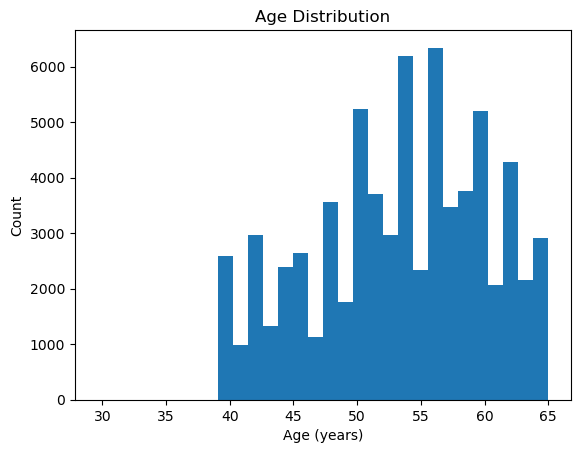

In [17]:
plt.hist(df_copy['age_years'], bins=30)
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

## 14. Histogram For Height & Weight

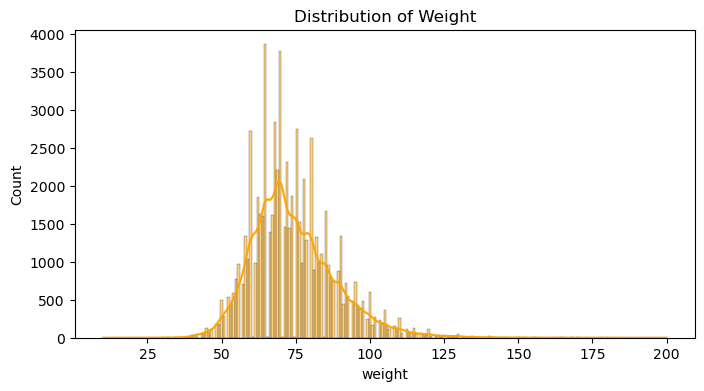

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='weight',kde=True,color='orange')
plt.title("Distribution of Weight")
plt.show()

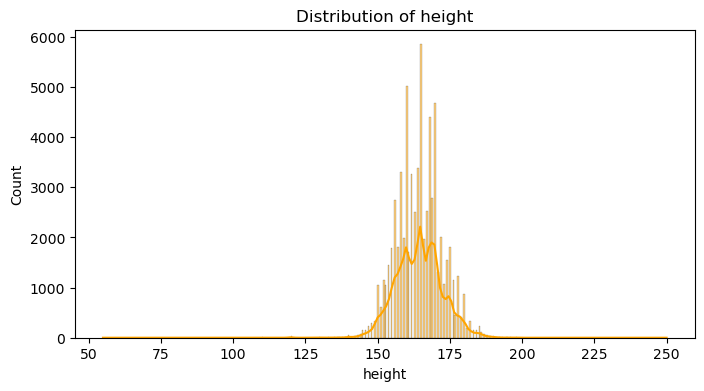

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='height',kde=True,color='orange')
plt.title("Distribution of height")
plt.show()

## 15. Scatter Plot (age_years vs ap_hi / ap_lo)

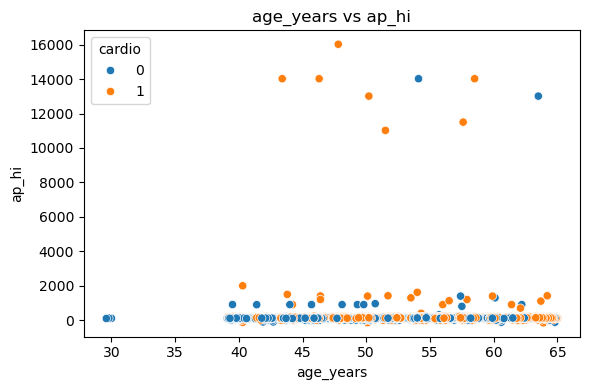

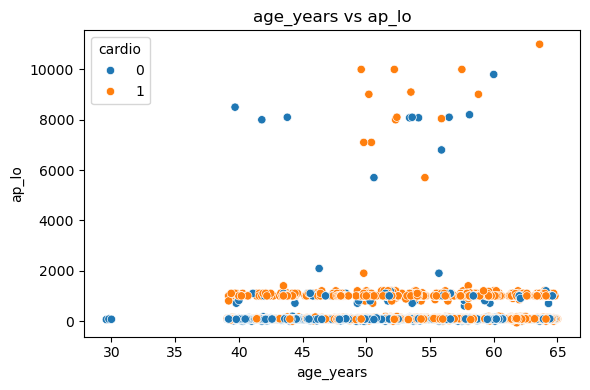

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age_years', y='ap_hi', hue='cardio', data=df.sample(min(70000,len(df))))
plt.title('age_years vs ap_hi')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='age_years', y='ap_lo', hue='cardio', data=df.sample(min(70000,len(df))))
plt.title('age_years vs ap_lo')
plt.tight_layout()
plt.show()